In [31]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D


print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("Version:",tf.__version__)

import matplotlib.pyplot as plt
import time

Num GPUs Available: 1
Version: 2.5.0-rc1


In [32]:
#import dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [33]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

#Validation data
val_images = train_images [-2500:]
val_labels = train_labels [-2500:]

train_images = train_images[:-2500]
train_labels = train_labels[:-2500]

In [34]:
#Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    Dense(64, activation='relu'),
    Dense(10)

])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [36]:
#Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
#Train model
batch_size = 32

startTime = time.time()
history = model.fit(train_images, train_labels, epochs=2, batch_size=batch_size,
                    validation_data=(test_images, test_labels))

finishTime = time.time()

Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpp9_zbei8.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpp9_zbei8.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1485/1485 [==============================] - 20s 5ms/step - loss: 1.7773 - accuracy: 0.3396 - val_loss: 1.2740 - val_accuracy: 0.5418
Epoch 2/2
1485/1485 [==============================] - 8s 5ms/step - loss: 1.2326 - accuracy: 0.5611 - val_loss: 1.1128 - val_accuracy: 0.6033


In [38]:
#Print train time
timeTaken = finishTime - startTime
minutes = timeTaken // 60
seconds = round((timeTaken % 60), 1)
print(f"Time taken: {minutes}m, {seconds}s" )

Time taken: 0.0m, 28.4s


In [39]:
#Evaluate model with test set
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2, batch_size=batch_size)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.1128 - accuracy: 0.6033

Test accuracy: 0.6032999753952026


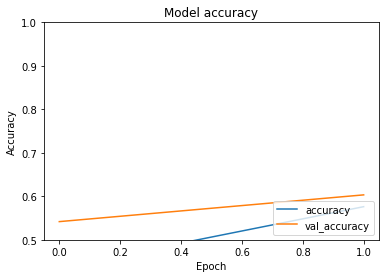

In [40]:
#Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

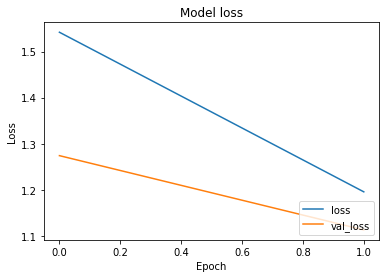

In [41]:
#Plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(loc='lower right')
plt.show()